#  Redes Neurais

## Perceptron

In [1]:
from IPython.display import Image
Image(url = 'Perceptron01.png')

https://github.com/rasbt/mlxtend

In [ ]:
# Mlxtend (machine learning extensions)
#!pip install mlxtend

In [2]:
# Módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
from time import time
%matplotlib inline

# Algoritmo Perceptron

In [3]:
# Algoritmo Perceptron
# eta = taxa de aprendizagem (learning rate) - valores entre 0 e 1
# epoch = número de passos no dataset de treino

class Perceptron(object):

    def __init__(self, eta = 0.01, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
# Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Obtendo dados de duas classes: Setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
X[:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

In [6]:
y[:3]

array([-1, -1, -1])

In [7]:
# Criando o modelo
clf_perceptron = Perceptron(epochs = 10, eta = 0.1)

In [8]:
# Treinamento
clf_perceptron.train(X, y)

Como podemos ver, o perceptron converge após a 6ª iteração e separa as duas classes de flores perfeitamente.

In [9]:
clf_perceptron.w_

array([-0.4 , -0.68,  1.82])

Pesos (Weights): [-0.4  -0.68  1.82]


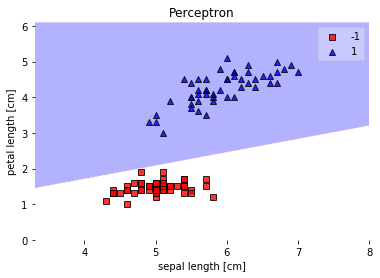

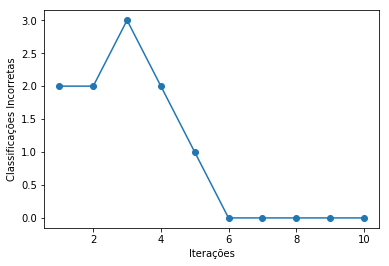

In [10]:
# Plot
print('Pesos (Weights): %s' % clf_perceptron.w_)
plot_decision_regions(X, y, clf = clf_perceptron)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(clf_perceptron.errors_)+1), clf_perceptron.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

## Problemas com o Perceptron

Embora o perceptron tenha classificado perfeitamente as duas classes de flores do dataset Iris, a convergência é um dos maiores problemas do perceptron. Frank Rosenblatt comprovou matematicamente que a regra de aprendizado do perceptron converge se as duas classes podem ser separadas por um hiperplano linear, mas surgem problemas se as classes não podem ser perfeitamente separadas por um hiperplano linear. Para demonstrar esse problema, usaremos duas classes e atributos diferentes do conjunto de dados Iris.

In [11]:
from IPython.display import Image
Image(url = 'Perceptron02.png')

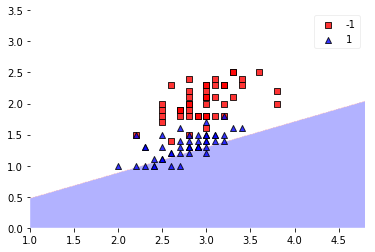

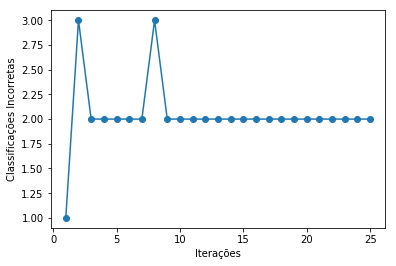

In [12]:
# Versicolor e virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)
X2 = df.iloc[50:150, [1,3]].values

clf = Perceptron(epochs = 25, eta = 0.01)
clf.train(X2, y2)

plot_decision_regions(X2, y2, clf = clf)
plt.show()

plt.plot(range(1, len(clf.errors_)+1), clf.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

Mesmo com uma menor taxa de treinamento, o perceptron não conseguiu encontrar um bom limite de decisão uma vez que uma ou mais amostras serão sempre mal classificadas em cada época (cada passada), de modo que a regra de aprendizagem nunca para de atualizar os pesos.

Outra falha do algoritmo perceptron é que ele para de atualizar os pesos assim que todas as amostras são classificadas corretamente. Nossa intuição nos diz que um limite de decisão com uma grande margem entre as classes provavelmente tem um erro de generalização melhor do que o limite de decisão do perceptron. Os classificadores de grande margem, como as Máquinas de Suporte Vector (SVM), resolveriam este problema.

In [13]:
print('Número Total de Classificações Incorretas: %d of 100' % (y2 != clf.predict(X2)).sum())

Número Total de Classificações Incorretas: 43 of 100


## Adaline e Regra Delta 

O perceptron certamente era muito popular no momento de sua descoberta, no entanto, levou apenas alguns anos até que Bernard Widrow e seu aluno de doutorado Tedd Hoff propuseram a ideia do Adaline (Adaptive Linear Neuron).

Em contraste com a regra perceptron, a regra delta do Adaline atualiza os pesos com base em uma função de ativação linear em vez de uma função de etapa unitária.

In [14]:
from IPython.display import Image
Image(url = 'Adaline01.png')

## Gradiente Descendente

Sendo uma função contínua, uma das maiores vantagens da função de ativação linear (Adaline) sobre a função de etapa unitária (Perceptron) é a possibilidade de diferenciar a saída. Esta propriedade permite definir uma função de custo J(w) que podemos minimizar para atualizar nossos pesos. No caso da função de ativação linear, podemos definir a função de custo J(w) como a soma de erros quadráticos (SSE), que é semelhante à função de custo que é minimizada em regressão linear com mínimos quadrados ordinários (OLS).

Para minimizar a função de custo do SSE, usaremos gradiente descendente, um algoritmo de otimização simples e útil que é frequentemente usado no aprendizado de máquinas para encontrar o mínimo local de sistemas lineares.

Antes de chegar à parte divertida (cálculo), vamos considerar uma função de custo convexo para um único peso. Conforme ilustrado na figura abaixo, podemos descrever o princípio por trás da descida do gradiente como "descer uma colina" até atingir um mínimo local ou global. Em cada passo, damos um passo na direção oposta do gradiente, e o tamanho do passo é determinado pelo valor da taxa de aprendizagem, bem como pela inclinação do gradiente.

In [15]:
from IPython.display import Image
Image(url = 'Gradiente01.png')

# Adaline com Gradiebte Descendente

In [16]:
# Adaline com Gradiebte Descendente
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Na prática, muitas vezes é necessário alguma experimentação para encontrar uma boa taxa de aprendizado para convergência ótima, assim, vamos começar por traçar o custo para duas taxas de aprendizagem diferentes.

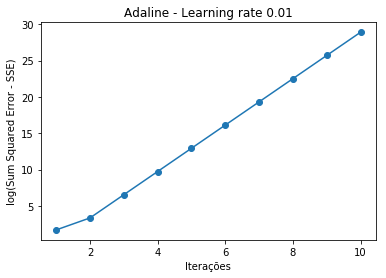

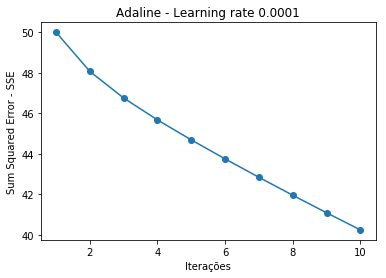

In [17]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterações')
plt.ylabel('log(Sum Squared Error - SSE)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

Os 2 plots acima enfatizam bem a importância de traçar curvas de aprendizagem ilustrando dois problemas mais comuns com gradiente descendente:

1- Se a taxa de aprendizado for muito grande, o gradiente descendente superará os mínimos e divergirá.

2- Se a taxa de aprendizagem for muito pequena, o algoritmo exigirá muitas épocas (passagens) para convergir e pode ficar preso nos mínimos locais com mais facilidade.

In [18]:
from IPython.display import Image
Image(url = 'Gradiente02.png')

O gradiente descendente é também um bom exemplo porque a escala (padronização) de atributos é importante para muitos algoritmos de aprendizagem de máquina. Não só é mais fácil encontrar uma taxa de aprendizado apropriada se as características estiverem na mesma escala, mas também muitas vezes leva a uma convergência mais rápida e pode impedir que os pesos se tornem muito pequenos (estabilidade numérica).

## Sem Padronização

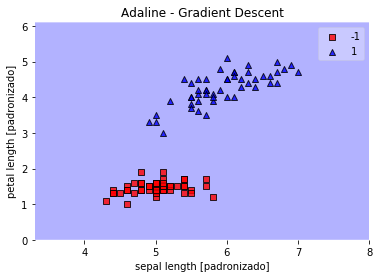

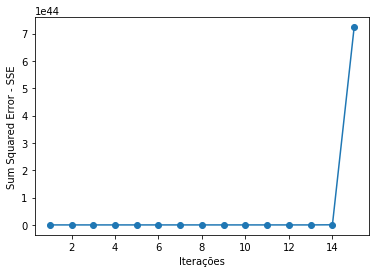

In [19]:
ada = AdalineGD(epochs = 15, eta = 0.01)

ada.train(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [padronizado]')
plt.ylabel('petal length [padronizado]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.show()

## Com Padronização

In [20]:
# Padronizando os atributos
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

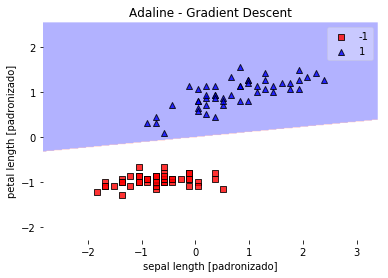

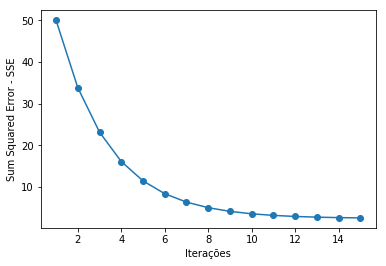

In [21]:
ada = AdalineGD(epochs = 15, eta = 0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [padronizado]')
plt.ylabel('petal length [padronizado]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.show()

## Online Learning com Stochastic Gradient Descent

A seção anterior foi sobre a aprendizagem baseada no gradiente descendente em "lote" (batch). As atualizações "em lote" referem-se ao fato de que a função de custo é minimizada com base no conjunto completo de dados de treinamento. Se pensarmos na regra do perceptron, lembramos que ela realizou a atualização de peso de forma incremental após cada amostra de treinamento individual. Essa abordagem também é chamada de aprendizagem "online", e de fato, é assim que Adaline foi descrita pela primeira vez por Bernard Widrow.

O processo de atualização incremental dos pesos é também chamado de Stochastic Gradient Descent, uma vez que aproxima a minimização da função de custo. Embora a abordagem da Stochastic Gradient Descent possa soar inferior ao gradiente descendente devido à sua natureza "estocástica" e à direção "aproximada" (gradiente), pode ter certas vantagens na prática. Muitas vezes, a descida de gradiente estocástica converge muito mais rápido do que a descida de gradiente, uma vez que as atualizações são aplicadas imediatamente após cada amostra de treinamento. A descida de gradiente estocástica é computacionalmente mais eficiente, especialmente para conjuntos de dados muito grandes. Outra vantagem do aprendizado on-line é que o classificador pode ser atualizado imediatamente à medida que novos dados de treinamento chegam, por exemplo, como em aplicativos da Web, e dados de treinamento antigos podem ser descartados se o armazenamento for um problema. Em sistemas de aprendizagem mecânica de grande escala, também é prática comum usar os chamados "mini-lotes", um compromisso com uma convergência mais suave do que a descida de gradiente estocástica.

In [22]:
# Algoritmo Adaline com Gradient Descent
class AdalineSGD(object):

    def __init__(self, eta = 0.01, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights = True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error

            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

---